Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


Solution : The number of multiplications needed to perform a matrix
multiplication is $n*k*m$ and the number of additions needed is $m*(k-1)*n$.

Explanation : To compute each element of the product matrix we need to multiply and sum the row and the column corresponding to the location of the element i.e $k$ multiplications and we need to find such $m*n$ elements, hence we need to perform $k*m*n$ multiplications.

For each element the no of additions will be $k-1$ and for $m*n$ elements the total number of additions will be $k-1*m*n$

Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [35]:
import numpy as np
import time

matrix_1 = np.array([[1,2,3],[2,4,5],[6,7,8]])
matrix_2 = np.array([[2,3,7],[7,8,9],[1,5,0]])
z1 = np.zeros([3,3])
t1 = time.time()
for i in range(len(matrix_1)):
  for j in range(len(z1[0])):
    for k in range(len(z1)):
      z1[i, j] += matrix_1[i,k] * matrix_2[j,k]

t2 = time.time()
z2 = np.dot(matrix_1,matrix_2)
t3 = time.time()
print(t2 - t1)
print(t3 - t2)

0.0002732276916503906
0.001726388931274414


NumPy is optimized and performs matrix operations using highly efficient C and Fortran libraries. This optimization makes NumPy much faster, especially for large matrices, due to the underlying optimized algorithms and parallelization.

Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Using the method of finding the highest elements, we find the time complexity to be $O(n^2)$

In [33]:
import timeit

arr = [12, 23, 44, 2, 5, 6, 9]
def median(arr):

  k = len(arr)
  for _ in range((len(arr) // 2) + 1):
      max_index = 0
      for i in range(k):
          if arr[i] > arr[max_index]:
              max_index = i
      arr[max_index], arr[k - 1] = arr[k - 1], arr[max_index]
      k -= 1
  median = arr[k]
  return median

time_taken = timeit.timeit(lambda: median(arr), number=100)
print(median(arr))
print("Time Taken:", round(time_taken, 5), "seconds")

import numpy as np

def median_numpy(arr):
    return np.median(arr)

arr = [12, 23, 44, 2, 5, 6, 9]

arr.sort()
if (len(arr) % 2) == 0:
  print(arr[len(arr)//2 - 1] + arr[len(arr)//2])
else:
  print(arr[len(arr)//2])

time_taken1 = timeit.timeit(lambda: median_numpy(arr), number=100)
print("Time Taken using numpy:", round(time_taken1, 5), "seconds")
print(median_numpy(arr))

9
Time Taken: 0.00053 seconds
9
Time Taken using numpy: 0.00284 seconds
9.0


time taken by using numpy is smaller when the list of number is large but for short list the time taken by simply sorting is less.

Q4. What is the gradient of the following function with respect to x and y?

$$x^2y + y^3sin(x)$$


The gradient of the following wrt x is : $2xy + y^3cos(x)$

The gradient of the following wrt y is : $x^2 + 3y^2sin(x)$

Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [12]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = jax.grad(f, argnums=(0, 1))

x_val = 2.0
y_val = 3.0

def f_x(x, y):
  return 2*x*y + y**3 * jnp.cos(x)

def f_y(x, y):
  return x**2 + 3*y**2*jnp.sin(x)

grad_x, grad_y = grad_f(x_val, y_val)

print(f"Gradient with respect to x at x={x_val}, y={y_val}: {grad_x}")
print(f"Gradient with respect to y at x={x_val}, y={y_val}: {grad_y}")

print(f_x(x_val, y_val))
print(f_y(x_val, y_val))

Gradient with respect to x at x=2.0, y=3.0: 0.7640352249145508
Gradient with respect to y at x=2.0, y=3.0: 28.551029205322266
0.7640352
28.55103


We can see that the gradient calculated analytically and mathematically are same.

Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [13]:
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the gradient
grad_f_x = sp.diff(f, x)
grad_f_y = sp.diff(f, y)

print(f"Gradient with respect to x: {grad_f_x}")
print(f"Gradient with respect to y: {grad_f_y}")

Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)


We can see that the gradient calculated analytically and mathematically are same.

Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
  1. Branch 1.
      1. Roll Number: 1, Name: N,
        1. Marks: Maths: 100, English: 70 …
   2. Branch 2
2. 2023
  1. Branch 1
  2. Branch 2
3. 2024
  1. Branch 1
  2. Branch 2
4. 2025
  1. Branch 1
  2. Branch 2

In [48]:
students_data = {
    2022: {
        'Branch 1': { 'Roll Number' : {

        },
        'Name' : {

        },
        'Marks' : {

        }
        },
        'Branch 2': {
        }
    },
    2023: {
        'Branch 1': {
        },
        'Branch 2': {
        }
    },
    2024: {
        'Branch 1': {

        },
        'Branch 2' : {

        }
    },
    2025: {
        'Branch 1' : {

        },
        'Branch 2' : {

        }
    }
}

print(students_data)

{2022: {'Branch 1': {'Roll Number': {}, 'Name': {}, 'Marks': {}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [2]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

student1 = Student(1, 'N', {'Maths': 100, 'English': 70})
student2 = Student(2, 'M', {'Maths': 90, 'English': 80})
student3 = Student(3, 'O', {'Maths': 95, 'English': 85})

branch1 = Branch('Branch 1')
branch1.students.extend([student1, student2])

branch2 = Branch('Branch 2')
branch2.students.append(student3)

year_2022 = Year(2022)
year_2022.add_branch(branch1)
year_2022.add_branch(branch2)

database = [year_2022]

for year in database:
    print(f"Year: {year.year}")
    for branch in year.branches:
        print(f"\tBranch: {branch.name}")
        for student in branch.students:
            print(f"\t\tRoll Number: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")


Year: 2022
	Branch: Branch 1
		Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
		Roll Number: 2, Name: M, Marks: {'Maths': 90, 'English': 80}
	Branch: Branch 2
		Roll Number: 3, Name: O, Marks: {'Maths': 95, 'English': 85}


Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y = x$
2. $y = x^2$
3. $y = x^3/100$
4. $y = sin(x)$
5. $y = sin(x)/x$
6. $y = log(x)$
7. $y = e^x$

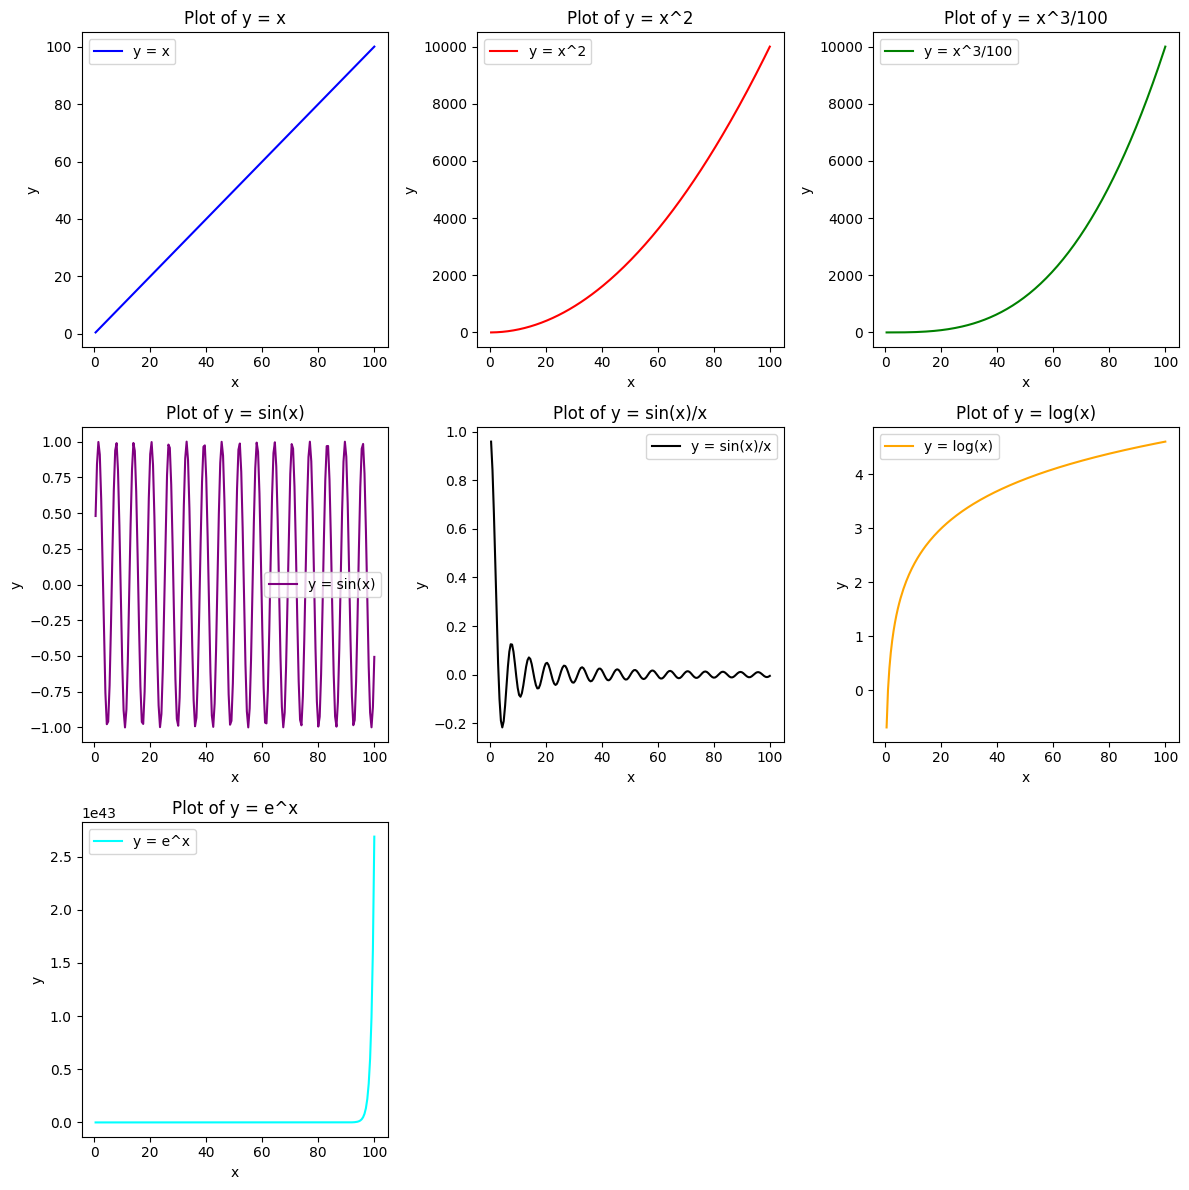

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y1 = x
y2 = x**2
y3 = x**3/100
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log(x)
y7 = np.e**x

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

axs[0][0].plot(x, y1, label='y = x', color='blue')
axs[0][0].set_xlabel('x')
axs[0][0].set_ylabel('y')
axs[0][0].set_title('Plot of y = x')
axs[0][0].legend()

axs[0][1].plot(x, y2, label='y = x^2', color='red')
axs[0][1].set_xlabel('x')
axs[0][1].set_ylabel('y')
axs[0][1].set_title('Plot of y = x^2')
axs[0][1].legend()

axs[0][2].plot(x, y3, label='y = x^3/100', color='green')
axs[0][2].set_xlabel('x')
axs[0][2].set_ylabel('y')
axs[0][2].set_title('Plot of y = x^3/100')
axs[0][2].legend()

axs[1][1].plot(x, y5, label='y = sin(x)/x', color='black')
axs[1][1].set_xlabel('x')
axs[1][1].set_ylabel('y')
axs[1][1].set_title('Plot of y = sin(x)/x')
axs[1][1].legend()

axs[1][2].plot(x, y6, label='y = log(x)', color='orange')
axs[1][2].set_xlabel('x')
axs[1][2].set_ylabel('y')
axs[1][2].set_title('Plot of y = log(x)')
axs[1][2].legend()

axs[1][0].plot(x, y4, label='y = sin(x)', color='purple')
axs[1][0].set_xlabel('x')
axs[1][0].set_ylabel('y')
axs[1][0].set_title('Plot of y = sin(x)')
axs[1][0].legend()

axs[2][0].plot(x, y7, label='y = e^x', color='cyan')
axs[2][0].set_xlabel('x')
axs[2][0].set_ylabel('y')
axs[2][0].set_title('Plot of y = e^x')
axs[2][0].legend()

axs.flatten()[8].axis("off")
axs.flatten()[7].axis("off")

plt.tight_layout()
plt.show()

Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.


In [35]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

highest_std_column = df.std().idxmax()

lowest_mean_row = df.mean(axis=1).idxmin()

print("Column with highest standard deviation:", highest_std_column)
print("Row with lowest mean:", lowest_mean_row)

Column with highest standard deviation: d
Row with lowest mean: 0


Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [36]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

lt8_count = df[df['g'] == 'LT8'].shape[0]

std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

print("Number of rows where 'g' is 'LT8':", lt8_count)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_lt8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_gt8)

Number of rows where 'g' is 'LT8': 15
Standard deviation of 'f' where 'g' is 'LT8': 0.5200524911787642
Standard deviation of 'f' where 'g' is 'GT8': 0.3658714313309271


Q12. Write a small piece of code to explain broadcasting in numpy.

In [40]:
import numpy as np

arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([20, 30, 40])

result = arr1 + arr2

print("Array 1:")
print(arr1)
print("\nArray 2:")
print(arr2)
print("\nResult of Addition:")
print(result)

Array 1:
[[1 2 3]
 [4 5 6]]

Array 2:
[20 30 40]

Result of Addition:
[[21 32 43]
 [24 35 46]]


Broadcasting rules allow NumPy to extend lower-dimensional arrays to have compatible shapes during operations. In this case, the second array arr2 is "broadcast" to match the shape of arr1 by replicating its values along the missing dimension, allowing the addition operation to be performed element-wise without explicitly expanding the dimensions or copying data.

Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [38]:
import numpy as np

def min_element(arr):

  min_array = arr[0]
  min_index = 0;
  for i in range(1, len(arr)):

    if(arr[i] < min_array):
      arr[i] == min_array
      min_index = i

  return min_index

arr = [10, 2, 3, 1]
print(min_element(arr))
print(np.argmin(arr))

3
3
